In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import zipfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

from skimage import color, io
from scipy.misc import imresize

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Activation, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras.models import Model

np.random.seed(31337)

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

Using TensorFlow backend.


In [2]:
X_train=np.load('catfish-X_train.npy')
Y_train=np.load('catfish-Y_train.npy')
import gc
gc.collect()


8

In [3]:
X_hard=np.load('catfish-X_hard.npy')
Y_hard=np.load('catfish-Y_hard.npy')

In [4]:
import gc
gc.collect()

8

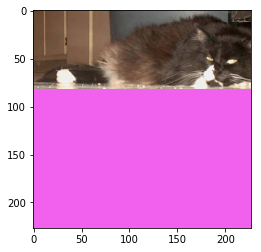

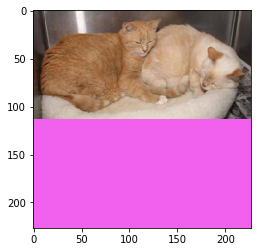

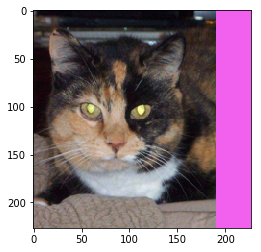

In [5]:
def unprocess_image(im):
    import copy
    im=copy.copy(im)
    # restore mean (sueezenet mean values)
    im[:, :, 0] += 104.006
    im[:, :, 1] += 116.669
    im[:, :, 2] += 122.679
    
    # swap RBGR->RBG
    im = im[:, :, ::-1]
    
    return im

num=1185
plt.imshow(unprocess_image(X_hard[num])*255)
plt.show()

num=1698
plt.imshow(unprocess_image(X_train[num])*255)
plt.show()


num=1231
plt.imshow(unprocess_image(X_train[num])*255)
plt.show()

In [6]:
import sys
sys.path.append("keras-squeezenet")

from squeezenet import get_squeezenet
from keras.models import Model

squeezenet_model = get_squeezenet(1000, dim_ordering='tf')
squeezenet_model.compile(loss="categorical_crossentropy", optimizer="adam")
squeezenet_model.load_weights('keras-squeezenet/model/squeezenet_weights_tf_dim_ordering_tf_kernels.h5', by_name=True)

squeezenet_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 227, 227, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Convolution2D)            (None, 113, 113, 64)  1792        input_1[0][0]                    
____________________________________________________________________________________________________
relu_conv1 (Activation)          (None, 113, 113, 64)  0           conv1[0][0]                      
____________________________________________________________________________________________________
pool1 (MaxPooling2D)             (None, 56, 56, 64)    0           relu_conv1[0][0]                 
___________________________________________________________________________________________

In [7]:
# trim after fire9/concat
squeezenet_model = Model(input=squeezenet_model.inputs, output=squeezenet_model.layers[61].output)
squeezenet_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 227, 227, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Convolution2D)            (None, 113, 113, 64)  1792        input_1[0][0]                    
____________________________________________________________________________________________________
relu_conv1 (Activation)          (None, 113, 113, 64)  0           conv1[0][0]                      
____________________________________________________________________________________________________
pool1 (MaxPooling2D)             (None, 56, 56, 64)    0           relu_conv1[0][0]                 
___________________________________________________________________________________________

In [8]:
train_preds=squeezenet_model.predict(X_hard, verbose=0)
print(train_preds.shape)

pickle_file = 'squeezenet_hard_preds-86528D.npy'
np.save(pickle_file,train_preds)
    
statinfo = os.stat(pickle_file)
print('File size:', statinfo.st_size)

(1186, 13, 13, 512)
File size: 410488928


In [9]:
train_preds=squeezenet_model.predict(X_train, verbose=0)
print(train_preds.shape)

pickle_file = 'squeezenet_train_preds-86528D.npy'
np.save(pickle_file,train_preds)

statinfo = os.stat(pickle_file)
print('File size:', statinfo.st_size)

(23814, 13, 13, 512)
File size: 8242311264


In [11]:
X_train=''
Y_train=''
X_hard=''
Y_hard=''
import gc
gc.collect()

12049

In [12]:
X_test=np.load('catfish-X_test.npy')

In [13]:
train_preds=squeezenet_model.predict(X_test, verbose=0)

pickle_file = 'squeezenet_test_preds-86528D.npy'
np.save(pickle_file,train_preds)


statinfo = os.stat(pickle_file)
print('File size:', statinfo.st_size)

File size: 4326400096
